In [1]:
# Importing libraries to collect and import data:
import json 
import requests 
import pickle

# Importing libraries to work with/explore data:
import pandas as pd
import numpy as np
import datetime, time
from sklearn import preprocessing

# Importing libraries to create visualizations:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# import itertools
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

In [3]:
with open ('raw_data/data.pickle','rb') as f:
    df_yelp = pickle.load(f)

print(len(df_yelp))
df_yelp.head()

22628


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,neighborhood
0,zRXMvxUX_rOliKZPpkWi_g,valerie-new-york,Valerie,https://s3-media3.fl.yelpcdn.com/bphoto/mnH5QF...,False,https://www.yelp.com/biz/valerie-new-york?adju...,624,"[{'alias': 'newamerican', 'title': 'American (...",4.5,"{'latitude': 40.756326, 'longitude': -73.981117}",[delivery],$$,{'address1': '45 W 45th St between 5th & 6th A...,+12123024545,(212) 302-4545,873.090639,Midtown West
1,DGhWO1sUWydVeR5j5ZZaMw,la-grande-boucherie-new-york-2,La Grande Boucherie,https://s3-media3.fl.yelpcdn.com/bphoto/b9URGc...,False,https://www.yelp.com/biz/la-grande-boucherie-n...,2118,"[{'alias': 'french', 'title': 'French'}, {'ali...",4.5,"{'latitude': 40.7626274, 'longitude': -73.9808...","[delivery, pickup]",$$$,"{'address1': '145 W 53rd St', 'address2': '', ...",+12125107714,(212) 510-7714,906.006620,Midtown West
2,NN3mOWF5e_pnR1ArqM2bHQ,obao-new-york-3,OBAO,https://s3-media4.fl.yelpcdn.com/bphoto/CpVI2X...,False,https://www.yelp.com/biz/obao-new-york-3?adjus...,3831,"[{'alias': 'vietnamese', 'title': 'Vietnamese'...",4.0,"{'latitude': 40.7606544, 'longitude': -73.991332}","[delivery, pickup]",$$,"{'address1': '647 9th Ave', 'address2': '', 'a...",+12122458880,(212) 245-8880,155.087703,Midtown West
3,AsN3B_FjIDxjISs9K_d_ZQ,peachy-keen-new-york,Peachy Keen,https://s3-media4.fl.yelpcdn.com/bphoto/MnYwi5...,False,https://www.yelp.com/biz/peachy-keen-new-york?...,341,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.5,"{'latitude': 40.75919366932837, 'longitude': -...","[delivery, pickup]",$$,"{'address1': '325 W 44th St', 'address2': None...",+12122452337,(212) 245-2337,80.636138,Midtown West
4,bVkjBJlAIwKAj9Aw1KVWjA,dim-sum-palace-new-york-8,Dim Sum Palace,https://s3-media4.fl.yelpcdn.com/bphoto/5Dg8lW...,False,https://www.yelp.com/biz/dim-sum-palace-new-yo...,1646,"[{'alias': 'dimsum', 'title': 'Dim Sum'}, {'al...",4.0,"{'latitude': 40.76015, 'longitude': -73.9893699}","[delivery, pickup]",$$,"{'address1': '334 W 46th St', 'address2': None...",+16468611910,(646) 861-1910,147.353923,Midtown West


In [5]:
df_inspec = pd.read_csv('raw_data/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')
df_inspec

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50131907,VIRGIN HOTEL SC1,Manhattan,1227,BROADWAY,10001.0,9179129221,NaN,01/01/1900,NaN,...,NaN,40.746628,-73.988491,105.0,3.0,7600.0,1000000.0,1.008310e+09,MN17,NaN
1,50126261,ENOTECA HARLEM,Manhattan,2220,FREDERICK DOUGLASS BOULEVARD,NaN,9179934459,NaN,01/01/1900,NaN,...,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
2,50114684,NaN,Queens,90-15,QUEENS BOULEVARD,11373.0,6466430589,NaN,01/01/1900,NaN,...,NaN,40.733840,-73.871577,404.0,25.0,68300.0,4045999.0,4.018600e+09,QN29,NaN
3,50092020,JOE'S COFFEE COMPANY (GOVERNORS ISLAND,Manhattan,517,CLAYTON ROAD,10004.0,2129247400,NaN,01/01/1900,NaN,...,NaN,40.691054,-74.019624,101.0,1.0,500.0,1086421.0,1.000010e+09,MN99,NaN
4,50124776,NaN,Manhattan,12,PARK AVENUE,10016.0,9292712723,NaN,01/01/1900,NaN,...,NaN,40.747412,-73.981107,106.0,2.0,7400.0,1017105.0,1.008640e+09,MN17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206999,50042180,MARIO'S PIZZA 2,Bronx,1011,WESTCHESTER AVENUE,10459.0,7189916142,Pizza,12/01/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.824060,-73.893103,202.0,17.0,12701.0,2005799.0,2.027260e+09,BX27,NaN
207000,50037443,SUSHI REN,Manhattan,1584,2 AVENUE,10028.0,2127108888,Japanese,10/30/2019,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.775431,-73.953507,108.0,5.0,13800.0,1049872.0,1.015450e+09,MN32,NaN
207001,41598620,DISFRUTA,Manhattan,510,WEST 207 STREET,10034.0,9172612862,Mexican,07/06/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.864756,-73.919336,112.0,10.0,29300.0,1081907.0,1.022190e+09,MN01,NaN
207002,50105536,SILVER STAR CR,Brooklyn,6221,18 AVENUE,11204.0,7183312799,Chinese,08/31/2021,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.620695,-73.988578,311.0,47.0,24800.0,3132794.0,3.055330e+09,BK28,NaN


In [ ]:
df_yelp['count'] = df_yelp.groupby('id')['id'].transform('count')

# Sort values by name and id:
df_yelp_sorted = df_yelp.sort_values(by=['alias', 'id'])

# Drop duplicate values:
df_yelp_filtered = df_yelp_sorted.drop_duplicates(subset=['alias', 'id'], keep='first', inplace=False).copy()

# Double check no duplicates remain:
df_yelp_filtered['count'] = df_yelp_filtered.groupby('id')['id'].transform('count')
print('# of Restaurants in Manhattan: ', len(df_yelp_filtered))
print('# of duplicates: ', len(df_yelp_filtered[df_yelp_filtered['count'] > 1]))
df_yelp_filtered.reset_index(inplace=True, drop = True)
df_yelp_filtered.head()

# of Restaurants in Manhattan:  7206
# of duplicates:  0


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,neighborhood,count
0,ZJRC1aIv4CIG6qMKZCR2bQ,1-columbia-deli-new-york,#1 Columbia Deli,https://s3-media3.fl.yelpcdn.com/bphoto/jAFR-u...,False,https://www.yelp.com/biz/1-columbia-deli-new-y...,4,"[{'alias': 'delis', 'title': 'Delis'}]",2.0,"{'latitude': 40.8118, 'longitude': -73.957643}","[delivery, pickup]",NaN,"{'address1': '1290 Amsterdam Ave', 'address2':...",+12129321290,(212) 932-1290,583.849193,Morningside Heights,1
1,oinbMkOklSpTiMoS24jppQ,1-noodle-cart-new-york,$1 Noodle Cart,https://s3-media4.fl.yelpcdn.com/bphoto/8G_u1v...,False,https://www.yelp.com/biz/1-noodle-cart-new-yor...,3,"[{'alias': 'foodstands', 'title': 'Food Stands...",3.0,"{'latitude': 40.717617, 'longitude': -74.000575}",[],NaN,"{'address1': '147 Ctr St', 'address2': None, '...",,,334.335889,Little Italy,1
2,dFPLilNrMi9KhhXQTEix5w,1-up-bistro-new-york,1 Up Bistro,https://s3-media3.fl.yelpcdn.com/bphoto/osl0Fd...,False,https://www.yelp.com/biz/1-up-bistro-new-york?...,12,"[{'alias': 'newamerican', 'title': 'American (...",3.5,"{'latitude': 40.7881799, 'longitude': -73.95365}","[pickup, delivery]",NaN,"{'address1': '1404 Madison Ave', 'address2': '...",+19174920697,(917) 492-0697,1679.770523,East Harlem,1
3,B8b_G0sW4RmhgpJQZu3FTA,106-108-bayard-st-corporation-new-york,106-108 Bayard St Corporation,,False,https://www.yelp.com/biz/106-108-bayard-st-cor...,0,"[{'alias': 'restaurants', 'title': 'Restaurant...",0.0,"{'latitude': 40.7163506001234, 'longitude': -7...",[],NaN,"{'address1': '75 Baxter St', 'address2': '', '...",+12129623204,(212) 962-3204,381.595237,Little Italy,1
4,bgnM6uy66zupYzb4QdL3vA,108-food-dried-hot-pot-new-york-2,108 Food Dried Hot Pot,https://s3-media2.fl.yelpcdn.com/bphoto/7zKgj_...,False,https://www.yelp.com/biz/108-food-dried-hot-po...,173,"[{'alias': 'hotpot', 'title': 'Hot Pot'}, {'al...",3.5,"{'latitude': 40.80265, 'longitude': -73.96721}","[pickup, delivery]",$$,"{'address1': '2794 Broadway', 'address2': None...",+19176756878,(917) 675-6878,712.856344,Morningside Heights,1


In [ ]:
df_yelp_filtered.drop(columns = ['alias', 'distance', 'id', 'image_url', 'is_closed', 'phone', 'url',
                            'count'], inplace = True, axis=1)

In [ ]:
# Extract dictionary values for the category, latitude, longitude, and location:
df_yelp_filtered['categories_clean'] = df_yelp_filtered['categories'].apply(lambda a: [x['alias'] for x in a])
df_yelp_filtered['latitude'] = df_yelp_filtered['coordinates'].apply(lambda x: x.get('latitude'))
df_yelp_filtered['longitude'] = df_yelp_filtered['coordinates'].apply(lambda x: x.get('longitude'))
df_yelp_filtered['address'] = df_yelp_filtered['location'].apply(lambda x: x.get('address1'))
df_yelp_filtered['city'] = df_yelp_filtered['location'].apply(lambda x: x.get('city'))
df_yelp_filtered['zip_code'] = df_yelp_filtered['location'].apply(lambda x: x.get('zip_code'))
df_yelp_filtered['state'] = df_yelp_filtered['location'].apply(lambda x: x.get('state'))

# Remove original categories, coordinates, and location columns:
df_yelp_filtered.drop(columns=['categories','coordinates', 'location'], inplace = True, axis=1)

# Print first 5 rows to ensure the data pulled in correctly:
df_yelp_filtered.head()

,name,review_count,rating,transactions,price,display_phone,neighborhood,categories_clean,latitude,longitude,address,city,zip_code,state
0,#1 Columbia Deli,4,2.0,"[delivery, pickup]",NaN,(212) 932-1290,Morningside Heights,[delis],40.811800,-73.957643,1290 Amsterdam Ave,New York,10027,NY
1,$1 Noodle Cart,3,3.0,[],NaN,,Little Italy,"[foodstands, noodles]",40.717617,-74.000575,147 Ctr St,New York,10013,NY
2,1 Up Bistro,12,3.5,"[pickup, delivery]",NaN,(917) 492-0697,East Harlem,"[newamerican, sandwiches]",40.788180,-73.953650,1404 Madison Ave,New York,10029,NY
3,106-108 Bayard St Corporation,0,0.0,[],NaN,(212) 962-3204,Little Italy,[restaurants],40.716351,-73.999981,75 Baxter St,New York,10013,NY
4,108 Food Dried Hot Pot,173,3.5,"[pickup, delivery]",$$,(917) 675-6878,Morningside Heights,"[hotpot, chinese]",40.802650,-73.967210,2794 Broadway,New York,10025,NY


In [ ]:
df_yelp_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7206 entries, 0 to 7205
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              7206 non-null   object 
 1   review_count      7206 non-null   int64  
 2   rating            7206 non-null   float64
 3   transactions      7206 non-null   object 
 4   price             4804 non-null   object 
 5   display_phone     7206 non-null   object 
 6   neighborhood      7206 non-null   object 
 7   categories_clean  7206 non-null   object 
 8   latitude          7206 non-null   float64
 9   longitude         7206 non-null   float64
 10  address           7177 non-null   object 
 11  city              7206 non-null   object 
 12  zip_code          7206 non-null   object 
 13  state             7206 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 788.3+ KB


In [ ]:
# Get dummy variables for categorical columns (categories and transactions):
categories_dummy = df_yelp_filtered['categories_clean'].str.join(sep=',').str.get_dummies(sep=',')
transactions_dummy = df_yelp_filtered['transactions'].str.join(sep=',').str.get_dummies(sep=',')

# Combine new columns with original dataframe:
df_yelp_filtered = pd.concat([df_yelp_filtered, categories_dummy, transactions_dummy], axis=1)
df_yelp_filtered.head()

,name,review_count,rating,transactions,price,display_phone,neighborhood,categories_clean,latitude,longitude,...,waffles,walkingtours,wedding_planning,whiskeybars,wine_bars,womenscloth,wraps,delivery,pickup,restaurant_reservation
0,#1 Columbia Deli,4,2.0,"[delivery, pickup]",NaN,(212) 932-1290,Morningside Heights,[delis],40.811800,-73.957643,...,0,0,0,0,0,0,0,1,1,0
1,$1 Noodle Cart,3,3.0,[],NaN,,Little Italy,"[foodstands, noodles]",40.717617,-74.000575,...,0,0,0,0,0,0,0,0,0,0
2,1 Up Bistro,12,3.5,"[pickup, delivery]",NaN,(917) 492-0697,East Harlem,"[newamerican, sandwiches]",40.788180,-73.953650,...,0,0,0,0,0,0,0,1,1,0
3,106-108 Bayard St Corporation,0,0.0,[],NaN,(212) 962-3204,Little Italy,[restaurants],40.716351,-73.999981,...,0,0,0,0,0,0,0,0,0,0
4,108 Food Dried Hot Pot,173,3.5,"[pickup, delivery]",$$,(917) 675-6878,Morningside Heights,"[hotpot, chinese]",40.802650,-73.967210,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
# Add in number of categories:
df_yelp_filtered['num_of_cat'] = df_yelp_filtered['categories_clean'].apply(lambda x: len(x))

# Find the most frequent categories (anything with over 150 entries):
all_category = pd.DataFrame(categories_dummy.sum().sort_values(ascending=False))
category = list(all_category[all_category[0] > 150].index)

# Identify each restaurant as either being a mainstream or a rare category:
df_yelp_filtered['mainstream_category'] = np.sum(df_yelp_filtered[category], axis = 1)
df_yelp_filtered['rare_category'] = 0
df_yelp_filtered.loc[df_yelp_filtered['mainstream_category'] == 0, 'rare_category'] = 1
df_yelp_filtered.loc[df_yelp_filtered['mainstream_category'] != 0, 'mainstream_category'] = 1

# Check that new columns show up correctly:
df_yelp_filtered.head()

,name,review_count,rating,transactions,price,display_phone,neighborhood,categories_clean,latitude,longitude,...,whiskeybars,wine_bars,womenscloth,wraps,delivery,pickup,restaurant_reservation,num_of_cat,mainstream_category,rare_category
0,#1 Columbia Deli,4,2.0,"[delivery, pickup]",NaN,(212) 932-1290,Morningside Heights,[delis],40.811800,-73.957643,...,0,0,0,0,1,1,0,1,1,0
1,$1 Noodle Cart,3,3.0,[],NaN,,Little Italy,"[foodstands, noodles]",40.717617,-74.000575,...,0,0,0,0,0,0,0,2,1,0
2,1 Up Bistro,12,3.5,"[pickup, delivery]",NaN,(917) 492-0697,East Harlem,"[newamerican, sandwiches]",40.788180,-73.953650,...,0,0,0,0,1,1,0,2,1,0
3,106-108 Bayard St Corporation,0,0.0,[],NaN,(212) 962-3204,Little Italy,[restaurants],40.716351,-73.999981,...,0,0,0,0,0,0,0,1,0,1
4,108 Food Dried Hot Pot,173,3.5,"[pickup, delivery]",$$,(917) 675-6878,Morningside Heights,"[hotpot, chinese]",40.802650,-73.967210,...,0,0,0,0,1,1,0,2,1,0


In [ ]:
df_yelp_filtered.isnull().sum()

name                         0
review_count                 0
rating                       0
transactions                 0
price                     2402
                          ... 
pickup                       0
restaurant_reservation       0
num_of_cat                   0
mainstream_category          0
rare_category                0
Length: 274, dtype: int64

In [ ]:
# Replace null values in the price column with 'zero'
df_yelp_filtered['price'].fillna(value='N/A', inplace=True)

# Update price to be numerical values:
price = {'$': 1, '$$': 2, '$$$':3, '$$$$': 4, 'N/A': 0}
df_yelp_filtered['price_value'] = df_yelp_filtered['price'].map(price)

# Remove null values from latitude, longitude, and address columns:
df_yelp_filtered.dropna(inplace=True)

In [ ]:
df_yelp_filtered.describe()

,review_count,rating,latitude,longitude,acaibowls,afghani,african,arcades,argentine,asianfusion,...,wine_bars,womenscloth,wraps,delivery,pickup,restaurant_reservation,num_of_cat,mainstream_category,rare_category,price_value
count,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,...,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000
mean,298.096572,3.834797,40.752224,-73.981287,0.002369,0.000557,0.003763,0.000279,0.001394,0.020903,...,0.041806,0.000139,0.005156,0.786093,0.679348,0.029682,2.163043,0.828595,0.171405,1.336957
std,576.200492,0.921474,0.088957,0.125199,0.048618,0.023605,0.061228,0.016693,0.037307,0.143070,...,0.200160,0.011805,0.071625,0.410091,0.466760,0.169721,0.836055,0.376888,0.376888,1.107166
min,0.000000,0.000000,33.795774,-84.414233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,3.500000,40.725454,-73.995253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,107.000000,4.000000,40.747810,-73.985671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,2.000000
75%,342.250000,4.500000,40.774477,-73.966132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,2.000000
max,14796.000000,5.000000,40.855144,-73.893070,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000


In [ ]:
# Replace outlier values in the review_count column (anything above 1000) with the number 1000:
df_yelp_filtered['review_count'] = np.where(df_yelp_filtered['review_count'].between(1000,12340), 1000,
                                       df_yelp_filtered['review_count'])

### INSPECTION DATA

In [ ]:
df_inspec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207004 entries, 0 to 207003
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  207004 non-null  int64  
 1   DBA                    205170 non-null  object 
 2   BORO                   207004 non-null  object 
 3   BUILDING               206697 non-null  object 
 4   STREET                 206977 non-null  object 
 5   ZIPCODE                204117 non-null  float64
 6   PHONE                  206991 non-null  object 
 7   CUISINE DESCRIPTION    202508 non-null  object 
 8   INSPECTION DATE        207004 non-null  object 
 9   ACTION                 202508 non-null  object 
 10  VIOLATION CODE         201279 non-null  object 
 11  VIOLATION DESCRIPTION  201279 non-null  object 
 12  CRITICAL FLAG          207004 non-null  object 
 13  SCORE                  196031 non-null  float64
 14  GRADE                  102421 non-nu

In [ ]:
# Change the inspection date column to datetime format:
df_inspec['INSPECTION DATE'] = pd.to_datetime(df_inspec['INSPECTION DATE'])

# Add a column that counts how many data entries have the same id (CAMIS) (and therefore represent the same restaurant):
df_inspec['#_of_inspections'] = df_inspec.groupby('CAMIS')['CAMIS'].transform('count')

# Sort values by name (DBA), id (CAMIS), and inspection date:
df_inspec_sorted = df_inspec.sort_values(by=['DBA', 'CAMIS','INSPECTION DATE'])

# Drop duplicate values:
df_inspec_filtered = df_inspec_sorted.drop_duplicates(subset=['DBA', 'CAMIS'], keep='last', inplace=False).copy()

# Double check no duplicates remain:
df_inspec_filtered['count_check'] = df_inspec_filtered.groupby('CAMIS')['CAMIS'].transform('count')
print('# of Restaurants in NYC: ', len(df_inspec_filtered))
print('# of duplicates: ', len(df_inspec_filtered[df_inspec_filtered['count_check'] > 1]))
df_inspec_filtered.reset_index(inplace=True, drop = True)
df_inspec_filtered.head()

# of Restaurants in NYC:  28367
# of duplicates:  0


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1,#_of_inspections,count_check
0,50126747,"""U"" LIKE CHINESE TAKE OUT",Manhattan,4926,BROADWAY,10034.0,2129426668,Chinese,2023-02-03,Violations were cited in the following area(s).,...,-73.921726,112.0,10.0,29300.0,1082052.0,1.022350e+09,MN01,NaN,5,1
1,50075009,#1 GARDEN CHINESE RESTAURANT,Brooklyn,221,PROSPECT PARK WEST,11215.0,9172508950,Chinese,2023-02-13,Establishment re-opened by DOHMH.,...,-73.980555,307.0,39.0,16900.0,3026939.0,3.011100e+09,BK40,NaN,14,1
2,41336841,#1 SABOR LATINO RESTAURANT,Bronx,4120,WHITE PLAINS ROAD,10466.0,7186532222,Latin American,2022-11-23,Violations were cited in the following area(s).,...,-73.858591,212.0,12.0,42200.0,2063603.0,2.048430e+09,BX44,NaN,11,1
3,50086385,$1 PIZZA,Manhattan,832,6 AVENUE,10001.0,9175878888,Pizza,2022-09-01,Violations were cited in the following area(s).,...,-73.990158,105.0,3.0,7600.0,1015746.0,1.008300e+09,MN17,NaN,18,1
4,50117047,$1 PIZZA,Manhattan,333B,AVENUE OF THE AMERICAS,10014.0,9173883956,Pizza,2022-06-06,Violations were cited in the following area(s).,...,-74.001176,102.0,3.0,6700.0,1010086.0,1.005898e+09,MN23,NaN,6,1


In [ ]:
# Remove columns that we will not be working with:
df_inspec_filtered.drop(columns = ['VIOLATION CODE', 'VIOLATION DESCRIPTION', 'RECORD DATE', 
                                   'Community Board', 'Council District', 'Census Tract','BIN','BBL','NTA',
                                   'count_check'], inplace = True, axis=1)

In [ ]:
# Update format of telephone numbers:
df_inspec_filtered['PHONE']=df_inspec_filtered['PHONE'].astype(str).apply(
    lambda x: '('+x[:3]+')'+' '+x[3:6]+'-'+x[6:10])

# Rename telephone number column to match the name in the df_filtered dataset:
df_inspec_filtered.rename(columns={'PHONE':'display_phone'}, inplace=True)

In [ ]:
df_inspec_filtered.isnull().sum()

CAMIS                      0
DBA                     1834
BORO                       0
BUILDING                  99
STREET                    27
ZIPCODE                  462
display_phone              0
CUISINE DESCRIPTION     4496
INSPECTION DATE            0
ACTION                  4496
CRITICAL FLAG              0
SCORE                   5080
GRADE                   7726
GRADE DATE              9303
INSPECTION TYPE         4496
Latitude                 115
Longitude                115
Location Point1        28367
#_of_inspections           0
dtype: int64

In [ ]:
# Replace null values in ACTION column with 'Not Yet Inspected' as per guidence from dataset creators
df_inspec_filtered['ACTION'].fillna(value='Not Yet Inspected', inplace=True)

# Replace null values in CRITICAL FLAG column with 'Not Applicable' as per guidence from dataset creators
df_inspec_filtered['CRITICAL FLAG'].fillna(value='Not Applicable', inplace=True)

# Replace null values in INSPECTION TYPE column with 'Unknown' as per guidence from dataset creators
df_inspec_filtered['INSPECTION TYPE'].fillna(value='Unknown', inplace=True)

In [ ]:
# Use details from Action column to determine grade status for rows with null values:
df_inspec_filtered['GRADE'].fillna(df_inspec_filtered['ACTION'], inplace=True)
df_inspec_filtered['GRADE'].replace({'Violations were cited in the following area(s).':'Z',
                                     'No violations were recorded at the time of this inspection.': 'A',
                                     'Not Yet Inspected':'N',
                                     'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.':'P',
                                     'Establishment re-opened by DOHMH': 'P','Establishment re-closed by DOHMH': 'P'}, inplace = True)

# Ensure GRADE column has only the grade letter scores and not any text from the Action column:
df_inspec_filtered['GRADE'].value_counts()

A                                                                                                                                     16503
N                                                                                                                                      6076
Z                                                                                                                                      4408
B                                                                                                                                      1006
C                                                                                                                                       286
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.       44
Establishment re-opened by DOHMH.                                                                                                        43
P                   

In [ ]:
df_inspec_filtered["GRADE"].replace({'N': 1,
                                     'Z': 1,
                                     'P': 1,
                                     'A': 5,
                                     'B': 4,
                                     'C': 3}, inplace = True)

In [ ]:
# Replace null values in grade date column with 'TBD' as the restaurants with no grade date do not yet have a grade.
df_inspec_filtered['GRADE DATE'].fillna(value='TBD', inplace=True)

df_inspec_filtered.drop(columns= ['Location Point1'], inplace=True)
# Drop all other rows with NaN values:
df_inspec_filtered.dropna(inplace=True)

# Double check we do not have any more null values:
df_inspec_filtered.isnull().sum()

CAMIS                  0
DBA                    0
BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
display_phone          0
CUISINE DESCRIPTION    0
INSPECTION DATE        0
ACTION                 0
CRITICAL FLAG          0
SCORE                  0
GRADE                  0
GRADE DATE             0
INSPECTION TYPE        0
Latitude               0
Longitude              0
#_of_inspections       0
dtype: int64

In [ ]:
df_inspec_filtered.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,#_of_inspections
count,2.285900e+04,22859.000000,22859.000000,22859.000000,22859.000000,22859.000000
mean,4.734082e+07,10690.282996,13.446170,40.727533,-73.943236,8.464718
std,4.113448e+06,593.437103,10.498392,0.068825,0.076690,6.022388
min,3.007544e+07,10000.000000,0.000000,40.499563,-74.248708,1.000000
25%,4.161186e+07,10023.000000,8.000000,40.686993,-73.989113,4.000000
50%,5.005689e+07,10472.000000,12.000000,40.732874,-73.958833,7.000000
75%,5.009968e+07,11229.000000,13.000000,40.762018,-73.902343,11.000000
max,5.013336e+07,12345.000000,140.000000,40.912822,-73.700928,65.000000


In [ ]:
df_inspec_filtered['#_of_inspections'] = np.where(df_inspec_filtered['#_of_inspections'].between(
    70,98), 70, df_inspec_filtered['#_of_inspections'])

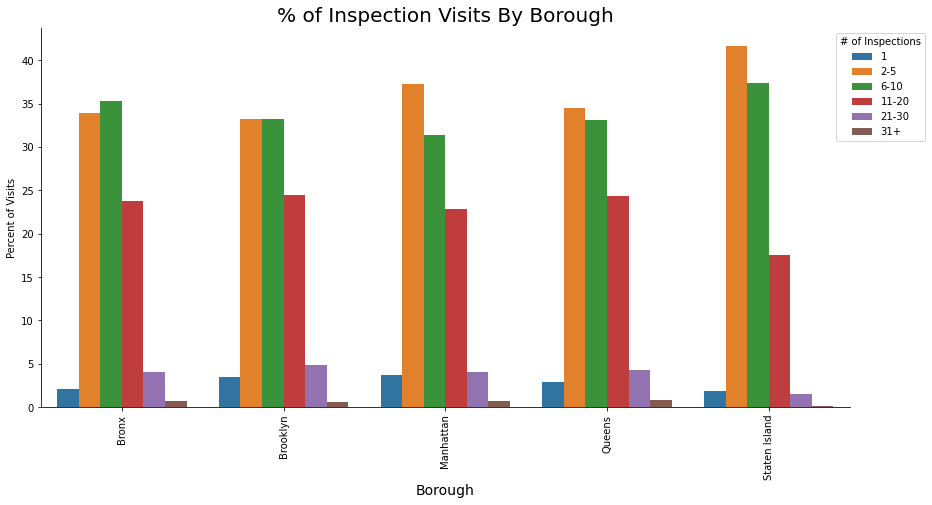

In [ ]:
# Define a function that will create ranges representing the value in the count column:
def count_range(x):
    '''This function will replace a numerical value with a corresponding range label.'''
    if x == 1:
        return '1'
    elif 2<=x<=5:
        return '2-5'
    elif 6<=x<=10:
        return '6-10'
    elif 11<=x<=20:
        return '11-20'
    elif 21<=x<=30:
        return '21-30'
    else:
        return '31+'

# Add a new column that gives a range of the number of visits based on the '#_of_inspections' column:
df_inspec_filtered['count_range'] = df_inspec_filtered['#_of_inspections'].apply(lambda x: count_range(x))

# Create a bar chart comparing the % of inspection visits for each borough:
x,y = 'BORO', 'count_range'
(df_inspec_filtered.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Visits')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Visits',hue=y,kind='bar',
                           hue_order = ['1','2-5','6-10','11-20','21-30','31+'],height=6, aspect=2, legend=False))

# Add chart title, labels, and legend
plt.title('% of Inspection Visits By Borough', fontsize=20)
plt.legend(loc='upper right', title = '# of Inspections', bbox_to_anchor=(1.1, 1))
plt.xlabel('Borough', fontsize=14)
plt.xticks(rotation='vertical');

In [ ]:
# Merge our 2 datasets using the restaurant's phone number:
df_merged = pd.merge(df_inspec_filtered, df_yelp_filtered, on=("display_phone"))

# Remove any restaurants not in Manhattan:
df_merged = df_merged.loc[df_merged['BORO']=='Manhattan']

# Reset index:
df_merged.reset_index(drop=True, inplace=True)

# Show new dataframe:
print('Length of Dataframe:',len(df_merged))
df_merged.head()

Length of Dataframe: 3174


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,display_phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,wine_bars,womenscloth,wraps,delivery,pickup,restaurant_reservation,num_of_cat,mainstream_category,rare_category,price_value
0,50122550,& CAFE COFFEE SHOP,Manhattan,222,EAST 51 STREET,10022.0,(908) 590-3763,Coffee/Tea,2023-01-03,Violations were cited in the following area(s).,...,0,0,0,0,0,0,3,1,0,0.0
1,50126158,& SON STEAKEASY,Manhattan,62,WEST 9 STREET,10011.0,(212) 933-1193,American,2023-02-04,Violations were cited in the following area(s).,...,1,0,0,0,0,0,3,1,0,0.0
2,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031.0,(212) 491-7466,Bakery Products/Desserts,2022-10-20,Violations were cited in the following area(s).,...,0,0,0,1,0,0,2,1,0,1.0
3,50059935,108 FOOD DRIED HOT POT,Manhattan,2794,BROADWAY,10025.0,(917) 675-6878,Chinese,2022-05-17,Violations were cited in the following area(s).,...,0,0,0,1,1,0,2,1,0,2.0
4,41092609,10TH AVENUE COOKSHOP,Manhattan,156,10 AVENUE,10011.0,(212) 924-4440,American,2022-04-11,Violations were cited in the following area(s).,...,0,0,0,1,1,0,2,1,0,2.0


In [ ]:
for i in df_merged.columns:
    print(i)

In [ ]:
with open ('scrubbed_data_yelp_inspec.pickle','wb')as f:
    pickle.dump(df_merged, f)

In [ ]:
# Import Data:
with open ('scrubbed_data_yelp_inspec.pickle','rb') as f:
    df_merged = pickle.load(f)

print(len(df_merged))
df_merged.head()

3174


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,display_phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,wine_bars,womenscloth,wraps,delivery,pickup,restaurant_reservation,num_of_cat,mainstream_category,rare_category,price_value
0,50122550,& CAFE COFFEE SHOP,Manhattan,222,EAST 51 STREET,10022.0,(908) 590-3763,Coffee/Tea,2023-01-03,Violations were cited in the following area(s).,...,0,0,0,0,0,0,3,1,0,0.0
1,50126158,& SON STEAKEASY,Manhattan,62,WEST 9 STREET,10011.0,(212) 933-1193,American,2023-02-04,Violations were cited in the following area(s).,...,1,0,0,0,0,0,3,1,0,0.0
2,41430594,1 STOP PATTY SHOP,Manhattan,1708,AMSTERDAM AVENUE,10031.0,(212) 491-7466,Bakery Products/Desserts,2022-10-20,Violations were cited in the following area(s).,...,0,0,0,1,0,0,2,1,0,1.0
3,50059935,108 FOOD DRIED HOT POT,Manhattan,2794,BROADWAY,10025.0,(917) 675-6878,Chinese,2022-05-17,Violations were cited in the following area(s).,...,0,0,0,1,1,0,2,1,0,2.0
4,41092609,10TH AVENUE COOKSHOP,Manhattan,156,10 AVENUE,10011.0,(212) 924-4440,American,2022-04-11,Violations were cited in the following area(s).,...,0,0,0,1,1,0,2,1,0,2.0


In [ ]:
df_merged['price_value'].astype(str)

# Get dummy variables for categorical columns that have not yet been one-hot encoded:
df_merged = pd.get_dummies(df_merged, columns = ['neighborhood', 'CRITICAL FLAG','count_range',
                          'price_value'])

In [ ]:
df_merged["GRADE"].value_counts()

1.00    2195
0.00     803
0.75     137
0.50      39
Name: GRADE, dtype: int64

In [ ]:
df_merged["GRADE"].replace({'Establishment re-opened by DOHMH.': 1,
                            'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.': 1}, inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
column_names_to_normalize = ['GRADE', 'rating']
x = df_merged[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_merged.index)
df_merged[column_names_to_normalize] = df_temp

In [ ]:
df_merged['combined_score'] = df_merged['rating']*df_merged['GRADE'] 

<AxesSubplot:>

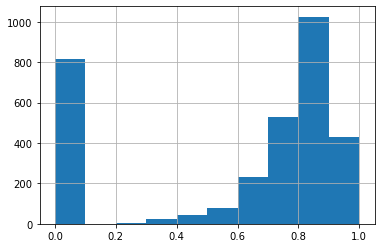

In [ ]:
df_merged["combined_score"].hist()

In [ ]:
# Convert ratings columns values so that the target variable will not be continuous: 
#df_merged['high_rating'] = df_merged['rating'].apply(lambda x: 1 if x > 3.5 else 0)

# Identify our X and y variables:
X = df_merged.drop(columns=['CAMIS','DBA','BORO','BUILDING','STREET','ZIPCODE','display_phone','CUISINE DESCRIPTION',
                           'INSPECTION DATE','ACTION','SCORE','GRADE DATE','INSPECTION TYPE','Latitude','Longitude',
                           '#_of_inspections','name','price','rating','review_count','transactions',
                            'categories_clean','latitude','longitude','address','city','zip_code',
                            'state','num_of_cat','combined_score', 'GRADE'],
                   axis=1)
y = df_merged.loc[:,'combined_score']

# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
d_tree = DecisionTreeRegressor(criterion='poisson', random_state=42)
d_tree = d_tree.fit(X_train, y_train)
y_pred_test_d_tree = d_tree.predict(X_test)
y_pred_train_d_tree = d_tree.predict(X_train)

In [ ]:
def reg_metrics(y_test, y_pred, X_train):
    from sklearn.metrics import mean_squared_error, r2_score 

    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    # Scikit-learn doesn't have adjusted r-square, hence custom code
    n = y_pred.shape[0]
    k = X_train.shape[1]
    adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

    print(rmse, r2, adj_r_sq)

In [ ]:
reg_metrics(y_test, y_pred_test_d_tree, X_train)

0.44256064450809074 -0.6475249963580483 -1.390920421543997


In [ ]:
from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor(max_depth = 9, min_samples_split = 9)
ran_f = r_forest.fit(X_train, y_train)
y_pred_test_r_forest = ran_f.predict(X_test)
y_pred_train_r_forest = ran_f.predict(X_train)

In [ ]:
reg_metrics(y_test, y_pred_test_r_forest, X_train)

0.32739018691486943 0.09839202109334555 -0.3084310913401449
